In [1]:
import stereo as st
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator
import warnings
warnings.filterwarnings('ignore')
st.__version__

'1.6.0'

In [2]:
data_path = '/work/CH36/04.tissuecut/C04580F3.ssDNA.gef'
st.io.read_gef_info(data_path)

[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1517][INFO]: This is GEF file which contains traditional bin infomation.
[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1518][INFO]: bin_type: bins
[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1521][INFO]: Bin size list: ['bin1', 'bin10', 'bin100', 'bin150', 'bin20', 'bin200', 'bin5', 'bin50']
[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1527][INFO]: Resolution: 500
[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1530][INFO]: Gene count: 20150
[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1539][INFO]: offsetX: 0
[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1542][INFO]: offsetY: 0
[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1545][INFO]: Width: 23519
[2025-06-11 17:19:41][Stereo][2563731][MainThread][231689497237

{'bin_list': ['bin1',
  'bin10',
  'bin100',
  'bin150',
  'bin20',
  'bin200',
  'bin5',
  'bin50'],
 'resolution': 500,
 'gene_count': 20150,
 'offsetX': 0,
 'offsetY': 0,
 'width': 23519,
 'height': 23518,
 'maxExp': 100}

In [3]:
data = st.io.read_gef(file_path=data_path, bin_size=50)
# simply type the varibale to get related information
data
data.tl.cal_qc()

[2025-06-11 17:19:41][Stereo][2563731][MainThread][23168949723712][reader][1339][INFO]: read_gef begin ...


2025-06-11 17:19:41 [INFO   ] input file:/work/CH36/04.tissuecut/C04580F3.ssDNA.gef specify block size:50


[2025-06-11 17:19:51][Stereo][2563731][MainThread][23168949723712][reader][1488][INFO]: the matrix has 43687 cells, and 20150 genes.
[2025-06-11 17:19:51][Stereo][2563731][MainThread][23168949723712][reader][1489][INFO]: read_gef end.
[2025-06-11 17:19:51][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run cal_qc...
[2025-06-11 17:19:52][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: cal_qc end, consume time 1.4742s.


In [5]:
import numpy as np
data.tl.filter_cells(
        min_counts=200,
        min_genes=3,
        max_genes=3500,
        pct_counts_mt=10,
        inplace=True
        )
genelist=data.genes.gene_name[~np.char.startswith(data.genes.gene_name, 'MT_')]
data.tl.filter_genes(gene_list=genelist,inplace=True)
data

[2025-06-11 17:19:56][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run filter_cells...
[2025-06-11 17:19:56][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: filter_cells end, consume time 0.6456s.
[2025-06-11 17:19:57][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run filter_genes...
[2025-06-11 17:19:57][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: filter_genes end, consume time 0.2562s.


StereoExpData object with n_cells X n_genes = 42462 X 20148
bin_type: bins
bin_size: 50
offset_x = 0
offset_y = 0
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['spatial']
Layers with keys: 
tl.result: []

In [7]:
data.tl.raw_checkpoint()
data.tl.raw
data.tl.normalize_total(target_sum=10000)
data.tl.log1p()

[2025-06-11 17:19:59][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run normalize_total...
[2025-06-11 17:20:00][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: normalize_total end, consume time 0.4102s.
[2025-06-11 17:20:00][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run log1p...
[2025-06-11 17:20:00][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: log1p end, consume time 0.2133s.


[2025-06-11 17:20:00][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2025-06-11 17:20:01][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: highly_variable_genes end, consume time 0.7981s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

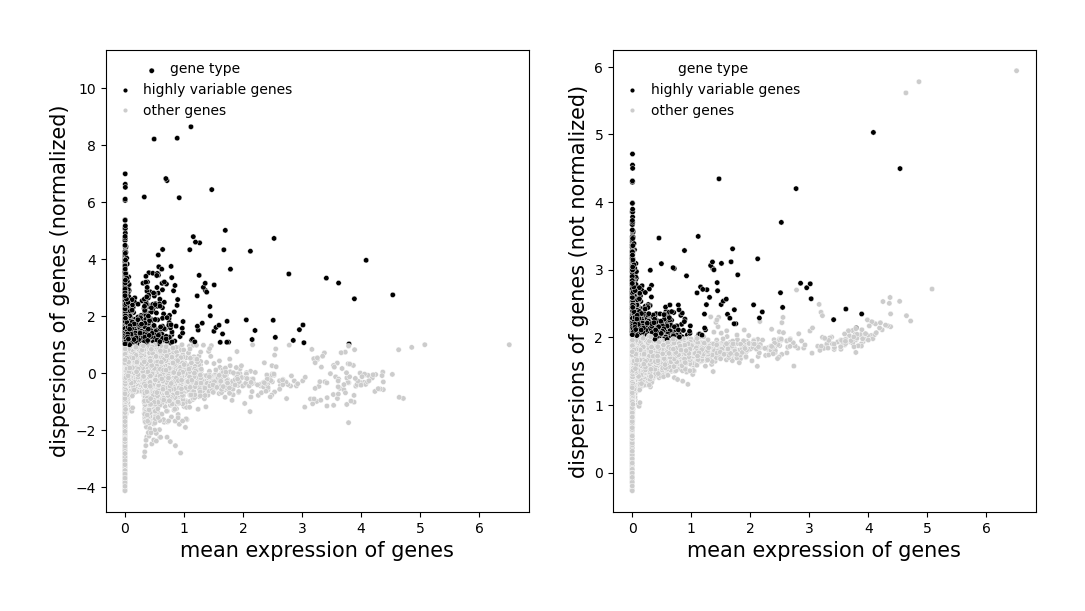

In [8]:
data.tl.highly_variable_genes(
        min_mean=0.0125,
        max_mean=3,
        min_disp=0.5,
        n_top_genes=2000,
        res_key='highly_variable_genes'
        )
# remember to choose a res_key when plot

data.plt.highly_variable_genes(res_key='highly_variable_genes')

[2025-06-11 17:20:02][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run scale...
[2025-06-11 17:20:09][Stereo][2563731][MainThread][23168949723712][scale][53][INFO]: Truncate at max_value 10
[2025-06-11 17:20:10][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: scale end, consume time 7.9613s.
[2025-06-11 17:20:10][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run pca...
[2025-06-11 17:20:20][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: pca end, consume time 10.3023s.
[2025-06-11 17:20:20][Stereo][2563731][MainThread][23168949723712][plot_collection][84][INFO]: register plot_func elbow to <stereo.plots.plot_collection.PlotCollection object at 0x1510d9e88130>
[2025-06-11 17:20:20][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run neighbors...
[2025-06-11 17:20:44][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: neighbors end, co

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2025-06-11 17:21:25][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: umap end, consume time 34.0809s.
[2025-06-11 17:21:25][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run leiden...
[2025-06-11 17:21:31][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: leiden end, consume time 5.9764s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

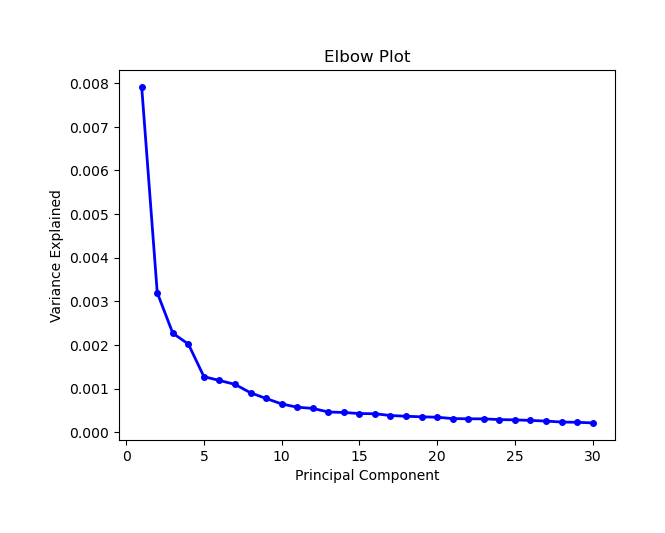

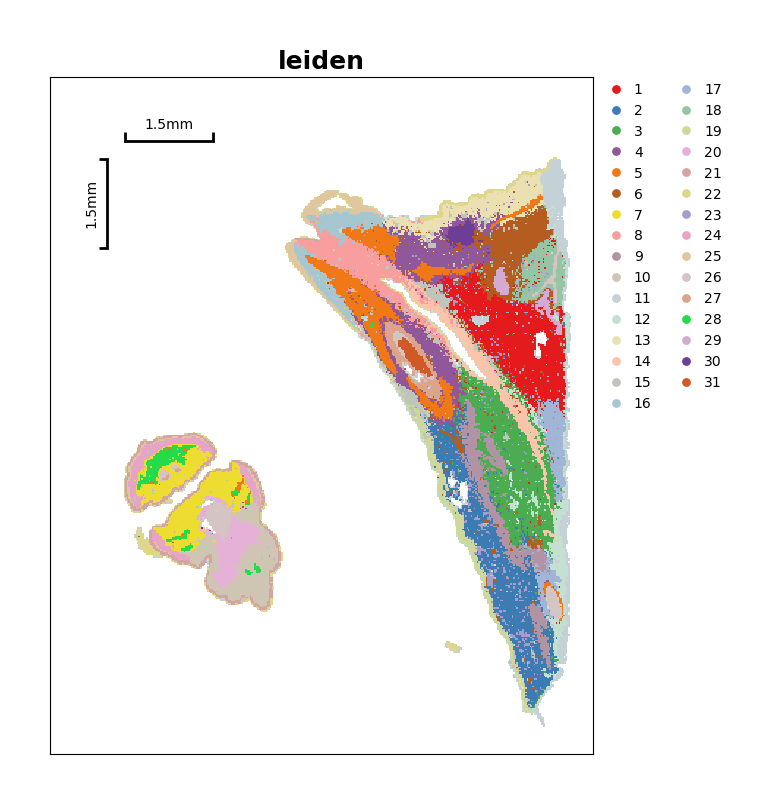

In [9]:
data.tl.scale(max_value=10, zero_center=True)
data.tl.pca(
        use_highly_genes=False,
        n_pcs=30,
        res_key='pca'
        )
data.plt.elbow(pca_res_key='pca')
data.tl.neighbors(
        pca_res_key='pca',
        n_pcs=30,
        res_key='neighbors'
        )

# compute spatial neighbors
data.tl.spatial_neighbors(
        neighbors_res_key='neighbors',
        res_key='spatial_neighbors'
        )
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')
data.plt.cluster_scatter(res_key='leiden')

[2025-06-11 17:21:33][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run leiden...
[2025-06-11 17:21:42][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: leiden end, consume time 8.9627s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

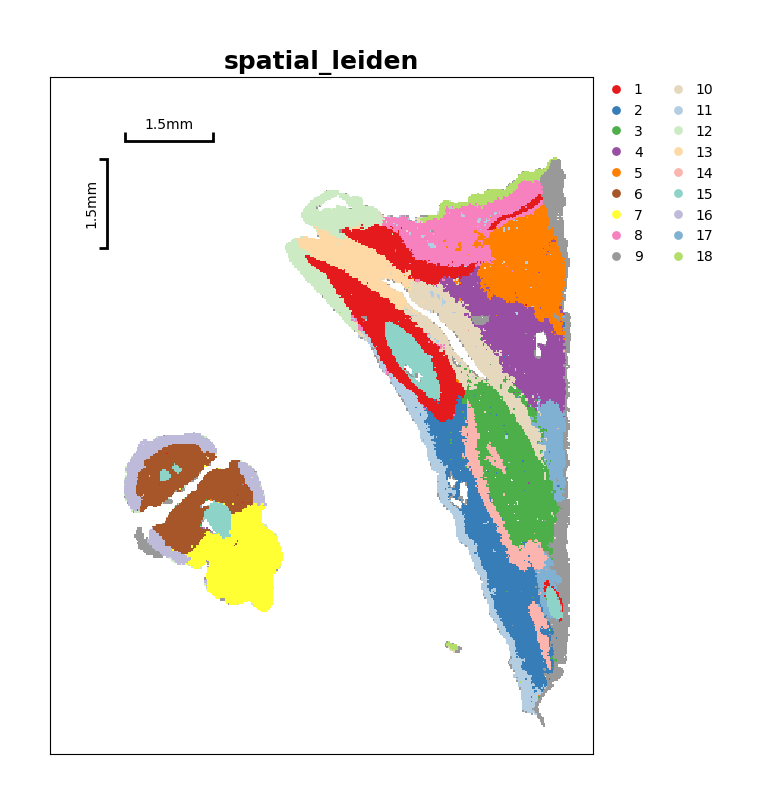

In [11]:
data.tl.leiden(neighbors_res_key='spatial_neighbors', res_key='spatial_leiden')
data.plt.cluster_scatter(res_key='spatial_leiden')

In [15]:
adata = st.io.stereo_to_anndata(data, output='./h5ad/CH36_bin50_seurat.h5ad')

[2025-06-11 17:22:05][Stereo][2563731][MainThread][23168949723712][reader][960][INFO]: Adding sample in adata.obs['orig.ident'].
[2025-06-11 17:22:05][Stereo][2563731][MainThread][23168949723712][reader][963][INFO]: Adding data.position as adata.obsm['spatial'] .
[2025-06-11 17:22:05][Stereo][2563731][MainThread][23168949723712][reader][968][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2025-06-11 17:22:05][Stereo][2563731][MainThread][23168949723712][reader][1008][INFO]: Adding data.tl.result['highly_variable_genes'] into adata.var .
[2025-06-11 17:22:05][Stereo][2563731][MainThread][23168949723712][reader][1051][INFO]: Adding data.tl.result['pca'] into adata.obsm['X_pca'] .
[2025-06-11 17:22:05][Stereo][2563731][MainThread][23168949723712][reader][1056][INFO]: Adding data.tl.result['pca_variance_ratio'] into adata.uns['pca_variance_ratio'] .
[2025-06-11 17:22:05][Stereo][2563731][MainThread][23168949723712][reader][1064][INFO]: Adding data.tl.result['neighbors']

In [ ]:

names_df = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
logfc_df = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])
pvals_df = pd.DataFrame(adata.uns['rank_genes_groups']['pvals'])
pvals_adj_df = pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])
scores_df = pd.DataFrame(adata.uns['rank_genes_groups']['scores'])


def melt_marker_df(df, value_name):
    df = df.reset_index().rename(columns={'index': 'rank'})
    df_long = pd.melt(df, id_vars=['rank'], var_name='cluster', value_name=value_name)
    return df_long

names_long = melt_marker_df(names_df, 'gene')
logfc_long = melt_marker_df(logfc_df, 'logfoldchange')
pvals_long = melt_marker_df(pvals_df, 'pval')
pvals_adj_long = melt_marker_df(pvals_adj_df, 'pval_adj')
scores_long = melt_marker_df(scores_df, 'score')

marker_long = names_long.merge(logfc_long, on=['rank', 'cluster'])
marker_long = marker_long.merge(pvals_long, on=['rank', 'cluster'])
marker_long = marker_long.merge(pvals_adj_long, on=['rank', 'cluster'])
marker_long = marker_long.merge(scores_long, on=['rank', 'cluster'])
marker_long = marker_long[marker_long['rank'] < 20]

marker_long = marker_long.sort_values(['cluster', 'rank'])
marker_long.to_csv('./csv/CH36_bin50.marker_genes.csv', index=True)

### hotspot

In [70]:
import pandas as pd

[2025-06-12 19:19:50][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run filter_genes...
[2025-06-12 19:19:52][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: filter_genes end, consume time 2.2137s.
[2025-06-12 19:19:52][Stereo][2563731][MainThread][23168949723712][st_pipeline][41][INFO]: start to run spatial_hotspot...
[2025-06-12 19:19:52][Stereo][2563731][MainThread][23168949723712][spatial_hotspot][50][INFO]: create the Hotspot object with 229 genes and 42462 cells, model=normal.
[2025-06-12 19:19:52][Stereo][2563731][MainThread][23168949723712][spatial_hotspot][52][INFO]: create_knn_graph with n_neighbors=30.
[2025-06-12 19:20:01][Stereo][2563731][MainThread][23168949723712][spatial_hotspot][56][INFO]: Start compute_autocorrelations.
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:08<00:00, 28.08i

Computing pair-wise local correlation on 141 features...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9870/9870 [00:03<00:00, 2781.71it/s]
[2025-06-12 19:20:27][Stereo][2563731][MainThread][23168949723712][spatial_hotspot][64][INFO]: Start create_modules with min_gene_threshold=8, fdr_threshold=0.05.
[2025-06-12 19:20:27][Stereo][2563731][MainThread][23168949723712][spatial_hotspot][68][INFO]: Start calculate_module_scores in per cell.


Computing scores for 4 modules...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.26it/s]
[2025-06-12 19:20:30][Stereo][2563731][MainThread][23168949723712][st_pipeline][44][INFO]: spatial_hotspot end, consume time 37.7441s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

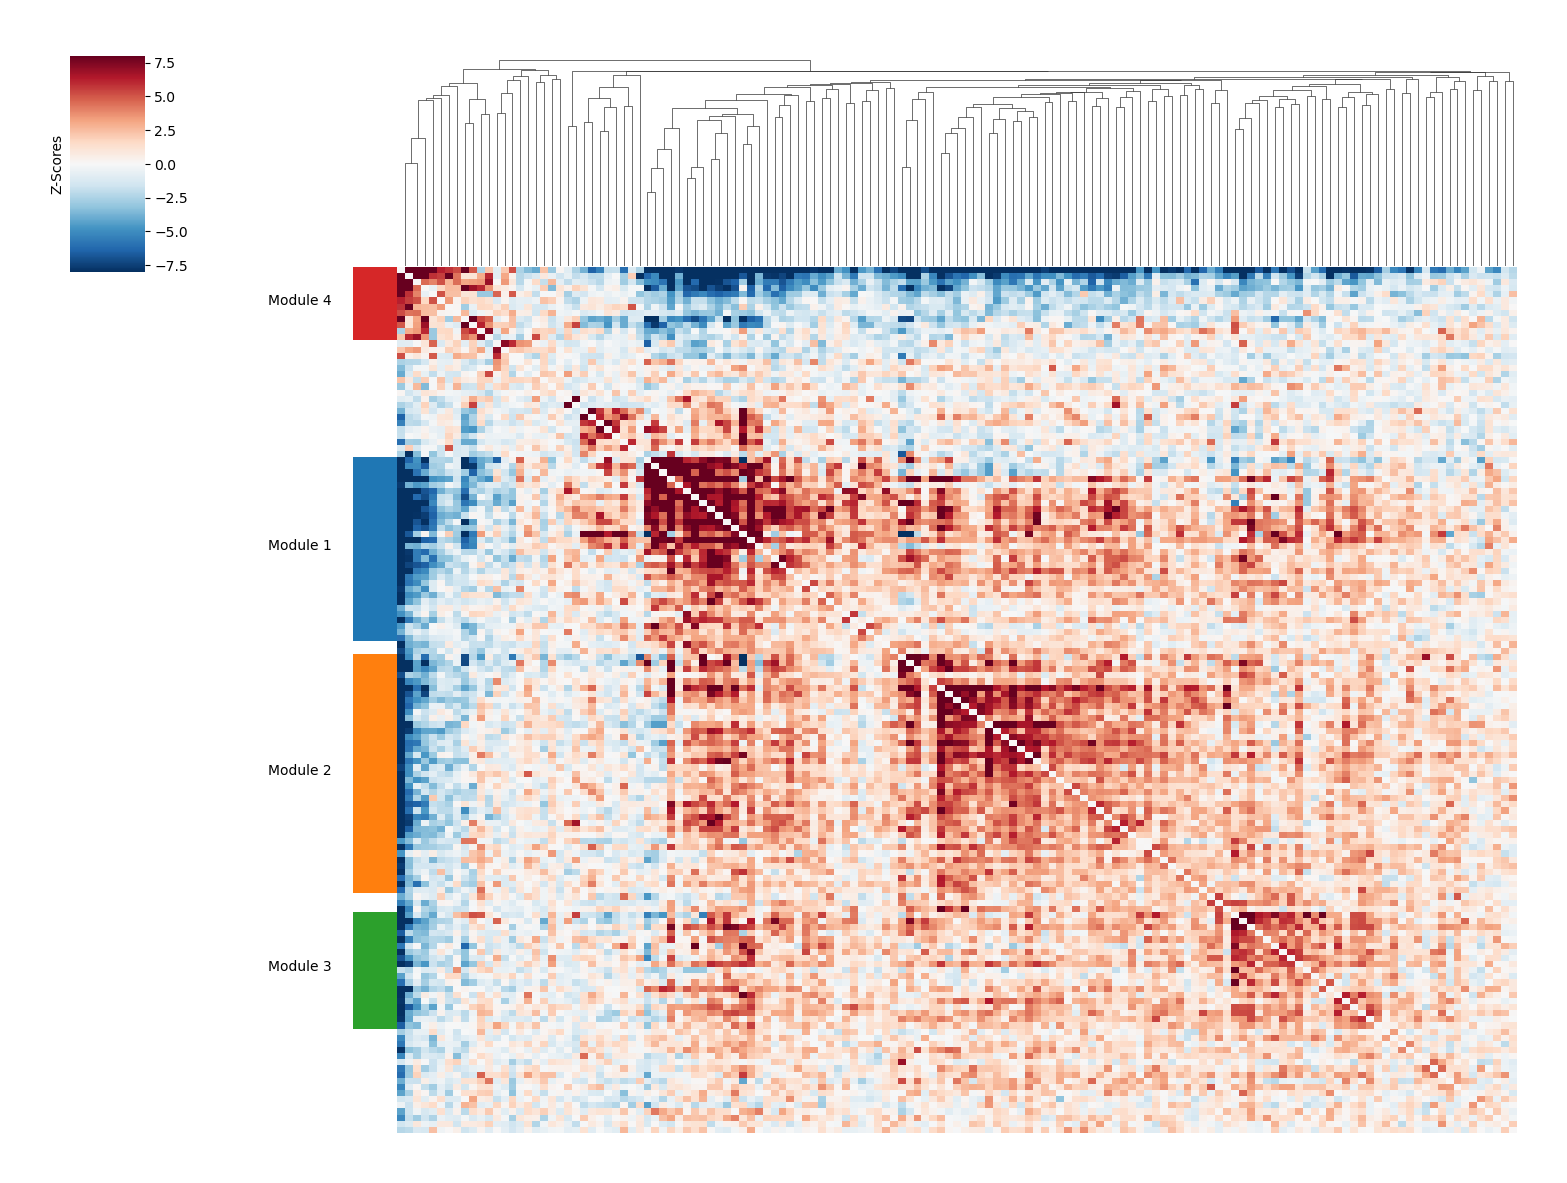

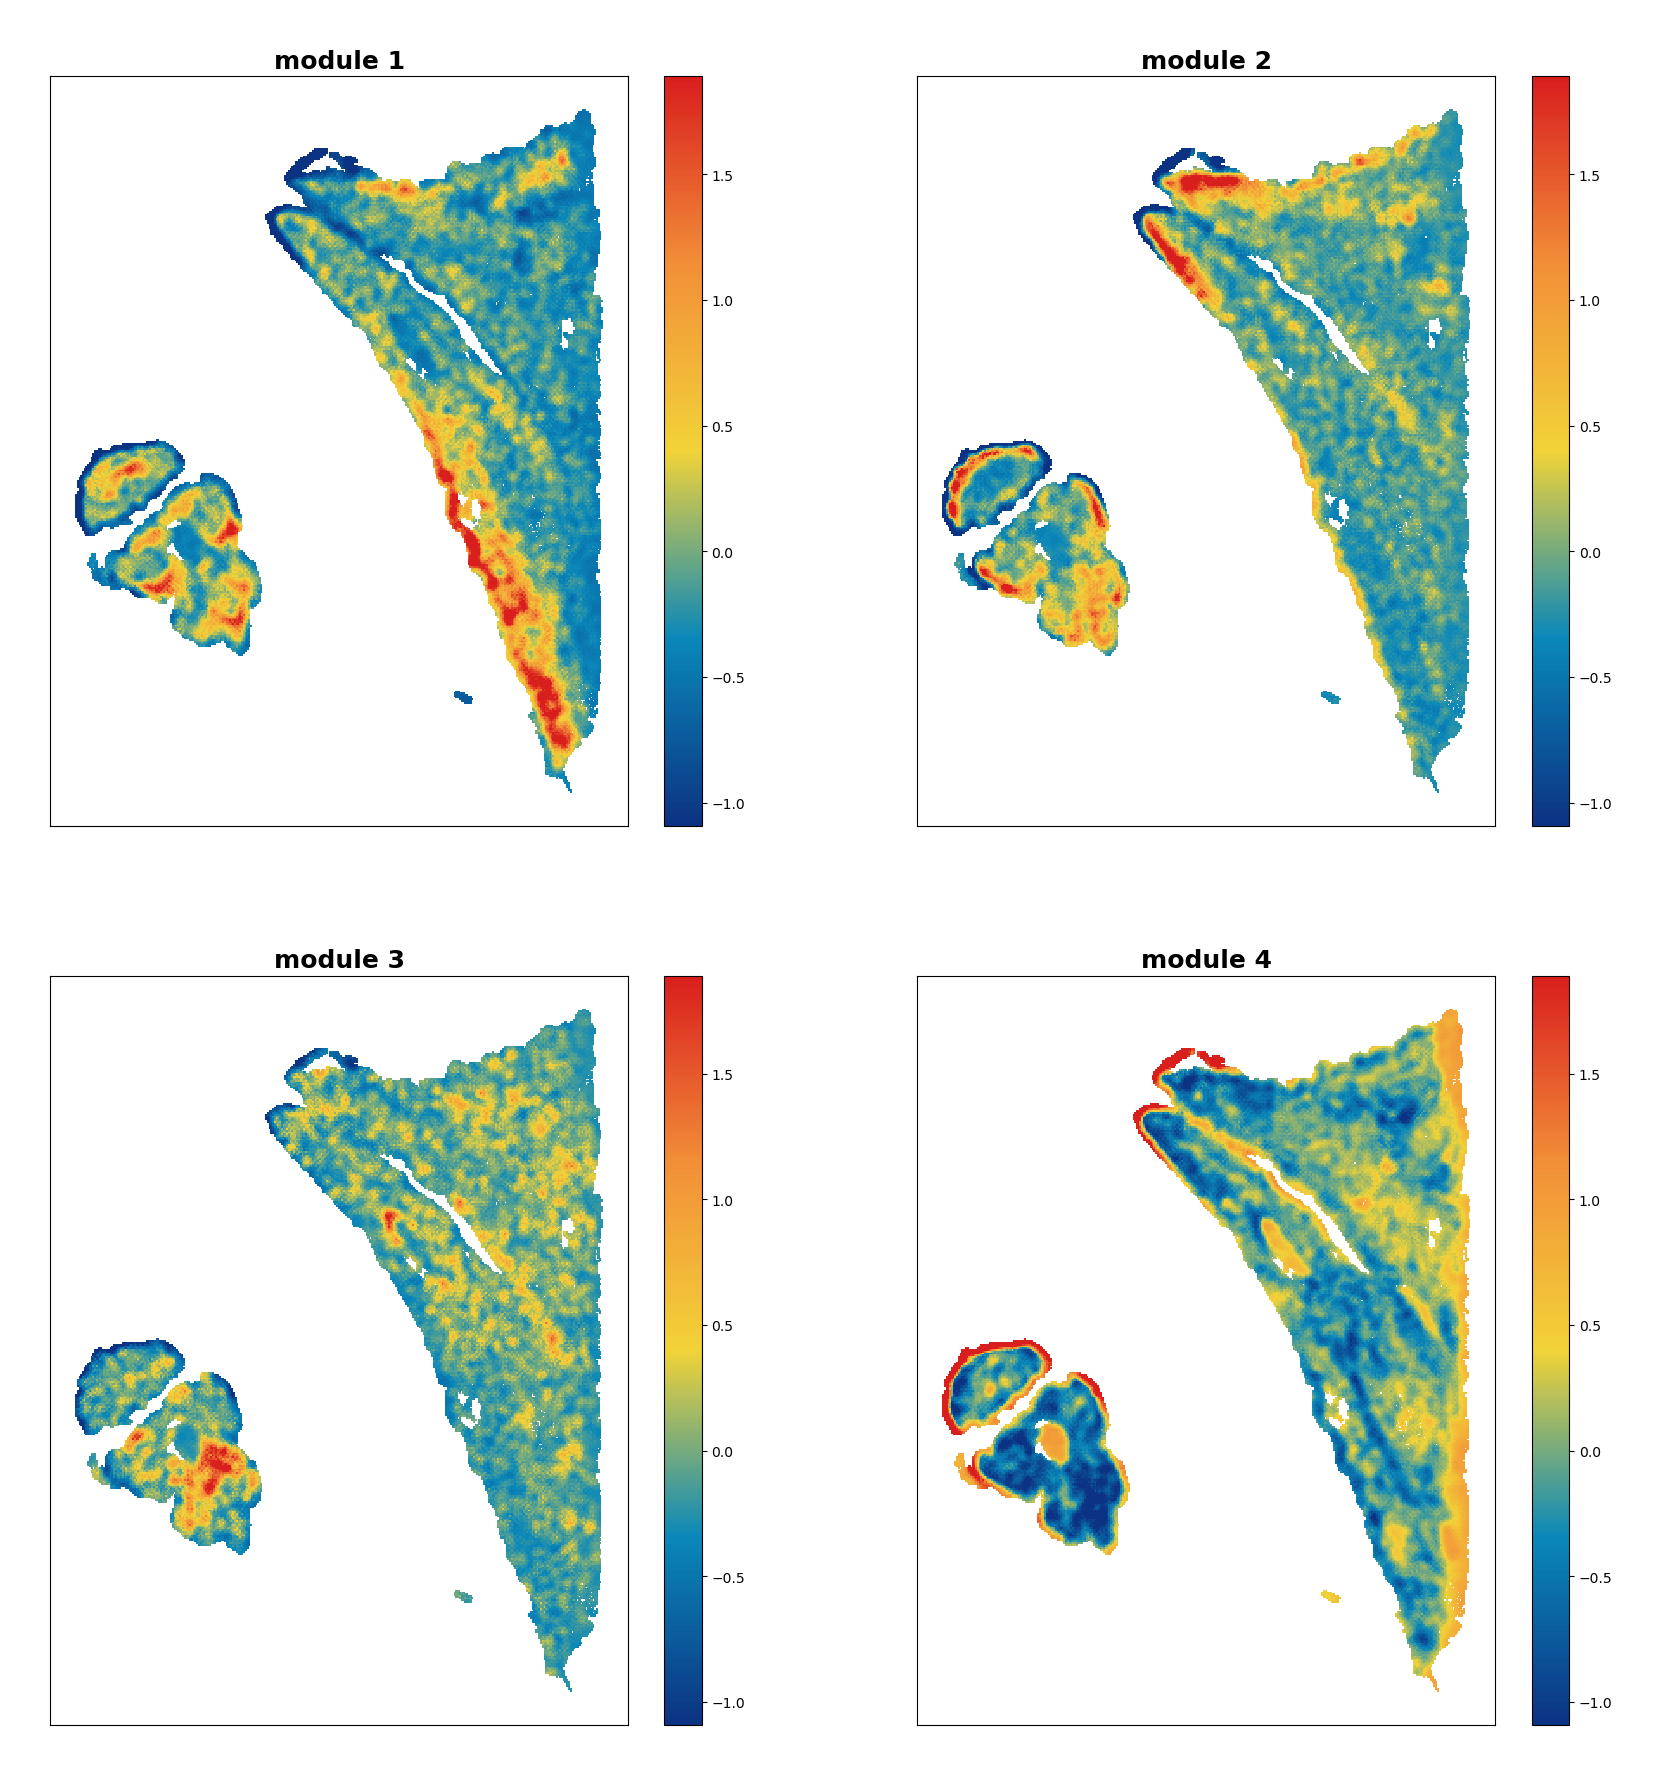

In [72]:
RGB302 = pd.read_csv("./RGB-BLBDBW.txt", sep='\t')
dataRGB302 = data.tl.filter_genes(gene_list=list(set(genelist).intersection(set(RGB302['GeneName']))),inplace=False)
dataRGB302
dataRGB302.tl.spatial_hotspot(
                    use_highly_genes=False,
                    use_raw=True,
                    hvg_res_key='highly_variable_genes',
                    model='normal',
                    n_neighbors=30,
                    n_jobs=20,
                    fdr_threshold=0.05,
                    min_gene_threshold=8,
                    res_key='spatial_hotspot',
                    )
dataRGB302.plt.hotspot_local_correlations()
dataRGB302.plt.hotspot_modules()

In [85]:
df = pd.DataFrame(dataRGB302.tl.result['spatial_hotspot'].modules, columns=['Module'])

# 根据 Module 列进行分类，并计算每个分类的计数
grouped = df.groupby('Module').size().reset_index(name='Count')

# 打印分类表格
print(grouped)

   Module  Count
0      -1     41
1       1     30
2       2     39
3       3     19
4       4     12


In [86]:
plt.close()
dataRGB302.plt.hotspot_local_correlations(out_dpi=300,out_path='./RGB302_CH36-hotspot_modules_cluster_plot.pdf')
plt.close()